# Notebook_7 - Eigenstuff



### Import needed packages

In [142]:
import numpy as np
import matplotlib.pyplot as plt
# let's set things up so we have nice font sizes
plt.rcParams.update({'font.size': 12})

# Linear Systems

Some helper functions for seeing what's going on here!

In [143]:
def plot_vector_field(M,zoom=10,grain=1,show_evecs=False,ICs=[]):
    evals,evecs = np.linalg.eig(M)
    # VECTOR FIELD SETUP
    xvals = np.arange(-zoom,zoom,grain)
    yvals = np.arange(-zoom,zoom,grain)
    X,Y = np.meshgrid(xvals,yvals)
    U = 0*X
    V = 0*Y
    for i,row in enumerate(X):
        for j,x in enumerate(row):
            y = Y[i,j]
            u,v = M.dot([x,y])
            U[i,j] = u
            V[i,j] = v
    # Plot
    fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(7,7))
    ax.quiver(X,Y,U,V,zorder=2)
    ax.set_xlim([-zoom,zoom])
    ax.set_ylim([-zoom,zoom])
    ax.plot(0,0,'or',zorder=3)
    if np.imag(evals[0])==0:
        m = evecs[1,0]/evecs[0,0]
        ax.plot([-zoom,zoom],[-zoom*m,zoom*m],'b--',alpha=0.5,zorder=1)
        m = evecs[1,1]/evecs[0,1]
        ax.plot([-zoom,zoom],[-zoom*m,zoom*m],'b--',alpha=0.5,zorder=1)
    for IC in ICs:
        X = solve(M,IC,zoom=zoom)
        ax.plot(IC[0],IC[1],'ko')
        ax.plot(X[:,0],X[:,1],lw=2,alpha=0.5,zorder=4)
    ax.set_title('Eigenvalues: {:.3f}, {:.3f}'.format(evals[0], evals[1]))
    plt.show()
    print('Eigenvalue 1:\n\t{:.3f}'.format(evals[0]))
    print('Eigenvector 1:\n\t{:.3f}\n\t{:.3f}'.format(evecs[0,0],evecs[1,0]))
    
    print('\nEigenvalue 2:\n\t{:.3f}'.format(evals[1]))
    print('Eigenvector 2:\n\t{:.3f}\n\t{:.3f}'.format(evecs[0,1],evecs[1,1]))

In [144]:
def solve(M,IC,zoom):
    X = [IC]
    dt = 0.01
    maxt=100
    t = 0
    exit_condition = any([t>maxt])
    while exit_condition==False:
        xt = X[-1] + M.dot(X[-1])*dt
        X.append(xt)
        t += dt
        exit_condition = any([t>maxt])
    return np.array(X)

# Linear Systems

Remember that we're interested in solving systems that look like:
$$\frac{d\vec{x}}{dt} = M \vec{x}$$

We know that in general, the solution is going to be
$$\displaystyle \vec{x}(t) = k_1 \vec{u_1}e^{\lambda_1 t} + k_2 \vec{u_2}e^{\lambda_2 t}$$
So we know, straight away, that the eigenvectors $u_1$ and $u_2$ are going to be relevant for the direction of solutions, and we know that the eigenvalues $\lambda_1$ and $\lambda_2$ are going to determine the rates of growth or decay along these eigenvectors. 

However, the equation above also shows us that the rates of change of the coordinates of $\vec{x}$ depend on what the matrix does to the current point $\vec{x}$.  That means that we can see the impact of the matrix as a *vector field*. 

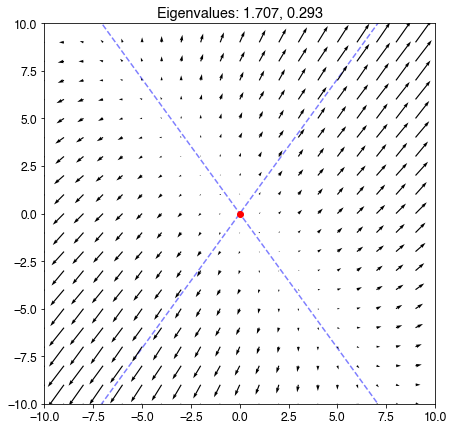

Eigenvalue 1:
	1.707
Eigenvector 1:
	0.577
	0.816

Eigenvalue 2:
	0.293
Eigenvector 2:
	-0.577
	0.816


In [147]:
M = np.array([
    [1,1/2],
    [1,1]])
plot_vector_field(M)